In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler; scaler = MinMaxScaler()
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

On part d'un dataset contenant le taux de mortalité calculé par tranche d'âge et par sexe, pour chaque pays et pour chaque année. 
Les valeurs manquantes des indicateurs ont été remplacées par la dernière année disponible par pays.
data.csv est issu du programme xxx et il comprend :
    - une séléction d'années : 16 années (2000 - 2015)
    - tous les pays ayant une correpondance entre le fichier mortalité et le fichier worldbank : 99 pays
    - un type de cancer : C33, C34 (cancer du poumon); pas de variable type de cancer présente dans le dataset
    - une séléction d'indicateurs : 44 choisis parmis ceux avec moins de 25% de valeurs manquantes

Liste des indicateurs, choisis pour avoir moins de 25% des valeurs manquantes :
        AG.LND.AGRI.K2	Agricultural land (sq. km)	0.096926511
        AG.LND.AGRI.ZS	Agricultural land (% of land area)	0.107572115
        AG.PRD.CROP.XD	Crop production index (2004-2006 = 100)	0.126373626
        AG.PRD.FOOD.XD	Food production index (2004-2006 = 100)	0.122510302
        AG.PRD.LVSK.XD	Livestock production index (2004-2006 = 100)	0.125429258
        AG.SRF.TOTL.K2	Surface area (sq. km)	0.01356456
        EN.ATM.CO2E.GF.ZS	CO2 emissions from gaseous fuel consumption (% of total)	0.148866758
        EN.ATM.CO2E.KT	CO2 emissions (kt)	0.158739698
        EN.ATM.CO2E.LF.KT	CO2 emissions from liquid fuel consumption (kt)	0.154447115
        EN.ATM.CO2E.LF.ZS	CO2 emissions from liquid fuel consumption (% of total)	0.148866758
        EN.ATM.CO2E.PC	CO2 emissions (metric tons per capita)	0.159168956
        EN.ATM.CO2E.SF.ZS	CO2 emissions from solid fuel consumption (% of total)	0.148866758
        EN.ATM.GHGO.KT.CE	Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)	0.107486264
        EN.ATM.GHGT.KT.CE	Total greenhouse gas emissions (kt of CO2 equivalent)	0.145861951
        EN.ATM.METH.AG.KT.CE	Agricultural methane emissions (thousand metric tons of CO2 equivalent)	0.154447115
        EN.ATM.METH.EG.KT.CE	Methane emissions in energy sector (thousand metric tons of CO2 equivalent)	0.154447115
        EN.ATM.METH.KT.CE	Methane emissions (kt of CO2 equivalent)	0.095896291
        EN.ATM.NOXE.AG.KT.CE	Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)	0.154447115
        EN.ATM.NOXE.EG.KT.CE	Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)	0.154447115
        EN.ATM.NOXE.KT.CE	Nitrous oxide emissions (thousand metric tons of CO2 equivalent)	0.09220467
        EN.POP.DNST	Population density (people per sq. km of land area)	0.019059066
        IT.CEL.SETS	Mobile cellular subscriptions	0.123025412
        IT.MLT.MAIN	Fixed telephone subscriptions	0.144316621
        NY.ADJ.AEDU.GN.ZS	Adjusted savings: education expenditure (% of GNI)	0.054601648
        NY.GDP.FRST.RT.ZS	Forest rents (% of GDP)	0.152730082
        NY.GDP.MINR.RT.ZS	Mineral rents (% of GDP)	0.152730082
        NY.GDP.MKTP.CD	GDP (current US$)	0.165350275
        NY.GDP.PCAP.CD	GDP per capita (current US$)	0.16560783
        NY.GDP.TOTL.RT.ZS	Total natural resources rents (% of GDP)	0.154447115
        SE.PRE.DURS	Preprimary education, duration (years)	0.015024038
        SE.PRM.DURS	Primary education, duration (years)	0.010903159
        SE.SEC.DURS	Secondary education, duration (years)	0.025068681
        SP.ADO.TFRT	Adolescent fertility rate (births per 1,000 women ages 15-19)	0.066449176
        SP.DYN.AMRT.FE	Mortality rate, adult, female (per 1,000 female adults)	0.077781593
        SP.DYN.AMRT.MA	Mortality rate, adult, male (per 1,000 male adults)	0.077781593
        SP.DYN.CBRT.IN	Birth rate, crude (per 1,000 people)	0.051682692
        SP.DYN.CDRT.IN	Death rate, crude (per 1,000 people)	0.053571429
        SP.DYN.LE00.FE.IN	Life expectancy at birth, female (years)	0.066706731
        SP.DYN.LE00.IN	Life expectancy at birth, total (years)	0.066706731
        SP.DYN.TFRT.IN	Fertility rate, total (births per woman)	0.066277473
        SP.POP.DPND	Age dependency ratio (% of working-age population)	0.070484203
        SP.POP.GROW	Population growth (annual %)	0.005408654
        SP.URB.GROW	Urban population growth (annual %)	0.005236951
        SP.URB.TOTL.IN.ZS	Urban population (% of total)	0.004807692 

In [18]:
df = pd.read_csv('data_2000.csv', header=0,sep=',', low_memory=False)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
df.head()

,Sex,Age_bucket,Year,Country,Mortality_rate,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SP.POP.GROW,SE.PRM.DURS,AG.SRF.TOTL.K2,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
0,1,1,2000,Antigua and Barbuda,0.0,32.127,0.966736,2.091312,7.0,440.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
1,2,3,2000,Antigua and Barbuda,0.0,32.127,0.966736,2.091312,7.0,440.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
2,2,4,2000,Antigua and Barbuda,0.0,32.127,0.966736,2.091312,7.0,440.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
3,2,5,2000,Antigua and Barbuda,0.0,32.127,0.966736,2.091312,7.0,440.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
4,2,6,2000,Antigua and Barbuda,0.0,32.127,0.966736,2.091312,7.0,440.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065


In [13]:
indicators = ['SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']          

In [22]:
#faute d'avoir la variable population pour pouvoir calculer le taux de mortalité moyen par pays, je fais la moyenne des moyennes
y = df.groupby(['Country'])['Mortality_rate'].mean()

In [24]:
mortality_cat = pd.qcut(x = y, q = [0, 0.25, 0.5, 0.75, 1], labels = [1,2,3,4]) #get series of unique group labelling for each country
d = mortality_cat.to_dict() #transform to dictionary
df['Mortality_group'] = df['Country'].map(d) #use dictionary to map the original data with the grouping

In [25]:
###### svm pour problème de classification
x = df[indicators + ['Sex', 'Age_bucket', 'Year']] #removed Country bc it was a string
y_cat = df['Mortality_group']

X_train, X_test, y_train, y_test = train_test_split(x, y_cat, random_state = 0)
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C, max_iter = 1000).fit(X_train, y_train)
print('Sans normalisation des features')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Sans normalisation de features
Accuracy of Linear SVC classifier on training set: 0.27
Accuracy of Linear SVC classifier on test set: 0.26


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


!!! Sans l'option max_iter, l'algorithme ne s'arrete pas. 
En limitant le nombre d'itérations, j'obtiens un avertissement de non convergence. 
Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)

In [27]:
#avec la normalisation des features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = SVC(kernel = 'linear', C=this_C, max_iter = 10000).fit(X_train, y_train)
print('Avec normalisation des features')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Avec normalisation des features
Accuracy of Linear SVC classifier on training set: 0.27
Accuracy of Linear SVC classifier on test set: 0.26


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packag

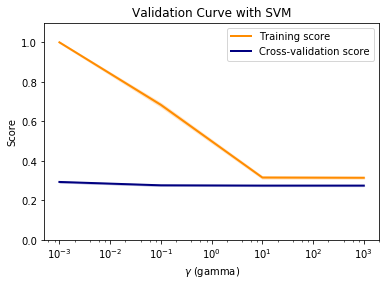

In [28]:
#Validation curve
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(max_iter=1000), x, y_cat,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()